In [29]:
from importlib import reload
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
import nextbus as nb
reload(nb)

<module 'nextbus' from 'C:\\Users\\bryce\\OneDrive\\Documents\\Projects\\Python\\Where-Is-The-5\\nextbus.py'>

In [37]:
predictions = nb.get_predictions(stop_id=10789)
locations = []
for vehicle in predictions['vehicle'].unique():
    locations.append(nb.get_vehicle_location(r=5, v=vehicle))
locations = pd.concat(locations)

In [45]:
import shapefile

sf = shapefile.Reader("centreline/CENTRELINE_WGS84.shp")

routes_of_interest = ['University Ave','Oriole Pkwy', 'Eglinton Ave W', 'Eglinton Ave E', 'Lonsdale Rd',
                      'Avenue Rd', "Queen's Park Cres W", "Queen's Park Cres E", "Queen's Park", 'Yonge St',
                     'College St']
shapes_of_interest = []
all_routes = []
for shape in sf.shapeRecords():
    all_routes.append(shape.record[2])
    if shape.record[2] in routes_of_interest:
        shapes_of_interest.append(shape)
        
all_routes = list(set(all_routes))

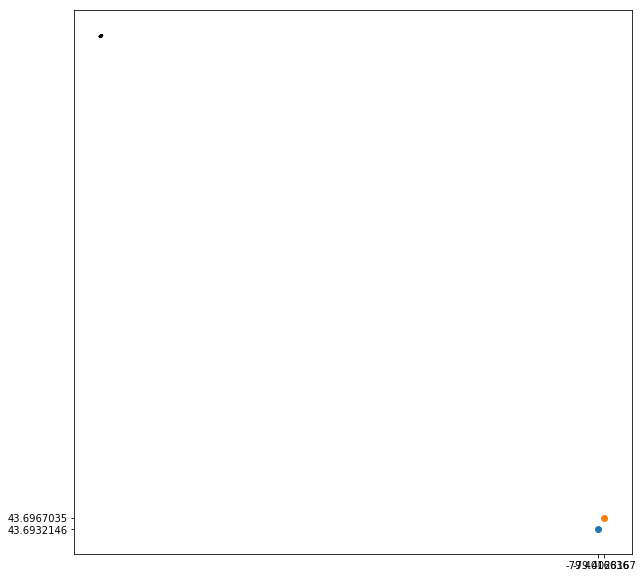

In [74]:
figsize = [10,10]
plt.figure(figsize=figsize)
aspect_ratio = figsize[1]/figsize[0]

# Plot the map
for shape in shapes_of_interest:
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y, color='black')

for i, location in locations.iterrows():
    plt.scatter(location['lon'],location['lat'])

delta = 0.1

x_mid = -79.4
y_mid = 43.66

#plt.xlim(x_mid-delta, x_mid+delta)
#plt.ylim(y_mid-(delta*aspect_ratio),y_mid+(delta*aspect_ratio))
    
plt.show()

id                        1233
routeTag                     5
dirTag                  5_1_5A
lat                 43.6932146
lon                -79.4016636
secsSinceReport             15
predictable               true
heading                    345
speedKmHr                   31
Name: 0, dtype: object
id                        1346
routeTag                     5
dirTag                  5_0_5A
lat                 43.6967035
lon                -79.4028167
secsSinceReport             15
predictable               true
heading                    165
speedKmHr                    7
Name: 0, dtype: object


In [68]:
print(locations[['lat','lon']])
print(x)
print(y)

          lat          lon
0  43.6932146  -79.4016636
0  43.6967035  -79.4028167
[-79.308309117, -79.308110464, -79.307495593]
[43.725245172, 43.725213829, 43.725122782]
